In [7]:
import numpy as np

# Definindo as funções de pertinência
def rating_mercado(score):
    if score <= 200:
        return {'RATING 6': 1}
    elif 200 < score <= 400:
        return {'RATING 5': (400 - score) / 200}
    elif 400 < score <= 600:
        return {'RATING 4': (600 - score) / 200}
    elif 600 < score <= 800:
        return {'RATING 3': (800 - score) / 200}
    elif 800 < score <= 900:
        return {'RATING 2': (900 - score) / 100}
    elif 900 < score <= 1000:
        return {'RATING 1': (1000 - score) / 100}
    else:
        return {}

def rating_interno(score):
    if score <= 200:
        return {'RATING 6': 1}
    elif 200 < score <= 400:
        return {'RATING 5': (400 - score) / 200}
    elif 400 < score <= 600:
        return {'RATING 4': (600 - score) / 200}
    elif 600 < score <= 800:
        return {'RATING 3': (800 - score) / 200}
    elif 800 < score <= 900:
        return {'RATING 2': (900 - score) / 100}
    elif 900 < score <= 1000:
        return {'RATING 1': (1000 - score) / 100}
    else:
        return {}

def engajamento(valor):
    if valor <= 100:
        return {'baixo': 1}
    elif 100 < valor <= 300:
        return {'medio': (300 - valor) / 200}
    elif valor > 300:
        return {'alto': min(1, (valor - 300) / 700)}
    else:
        return {}

# Definindo a aplicação das regras
def aplicar_regras(engajamento_label, rating_motorista_label, rating_mercado_label):
    # Aplicação conforme as regras da imagem
    if engajamento_label == 'baixo' and rating_motorista_label in ['RATING 6', 'RATING 5', 'RATING 4', 'RATING 3']:
        return 5
    if engajamento_label == 'baixo' and rating_motorista_label in ['RATING 1', 'RATING 2']:
        return 4
    if engajamento_label == 'medio' and rating_motorista_label in ['RATING 6', 'RATING 5', 'RATING 4']:
        return 5
    if engajamento_label == 'medio' and rating_motorista_label in ['RATING 1', 'RATING 2', 'RATING 3']:
        return 3
    if engajamento_label == 'alto' and rating_motorista_label == 'RATING 6':
        return 4
    if engajamento_label == 'alto' and rating_motorista_label in ['RATING 4', 'RATING 5']:
        return 3
    if engajamento_label == 'alto' and rating_motorista_label == 'RATING 3':
        return 2
    if engajamento_label == 'alto' and rating_motorista_label in ['RATING 1', 'RATING 2']:
        return 1
    return None

# Entrada de dados
score_mercado = 2
score_interno = 230
valor_engajamento = 90

# Calculando as pertinências
rating_mercado_label = list(rating_mercado(score_mercado).keys())[0]
rating_motorista_label = list(rating_interno(score_interno).keys())[0]
engajamento_label = list(engajamento(valor_engajamento).keys())[0]

# Aplicando as regras
grau_de_risco = aplicar_regras(engajamento_label, rating_motorista_label, rating_mercado_label)

# Exibindo o resultado
print(f"Grau de risco calculado: {grau_de_risco}")


Grau de risco calculado: 5


Para score_mercado = 2, score_interno = 230 e engajamento = 90:
A política de risco calculada é: 740.40


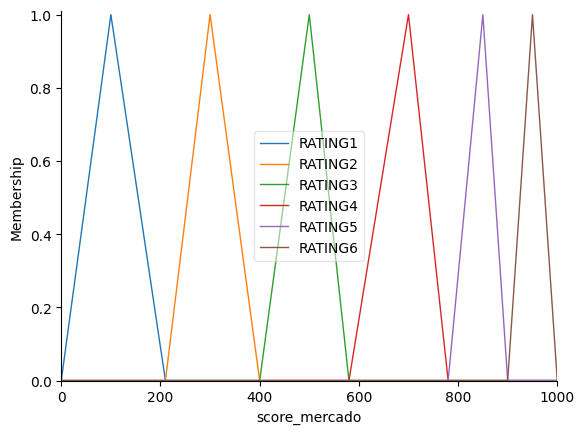

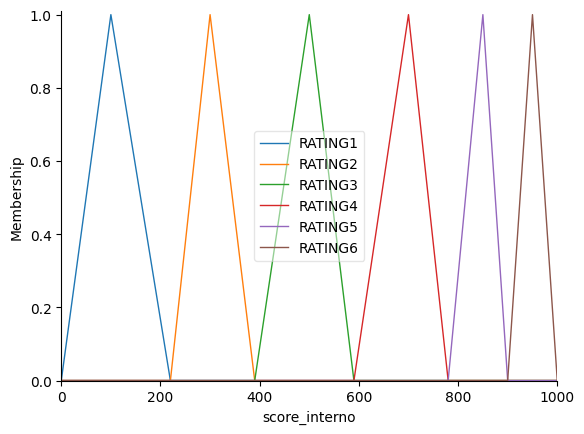

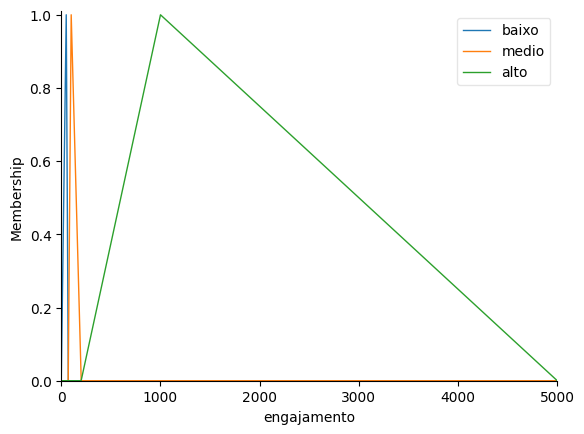

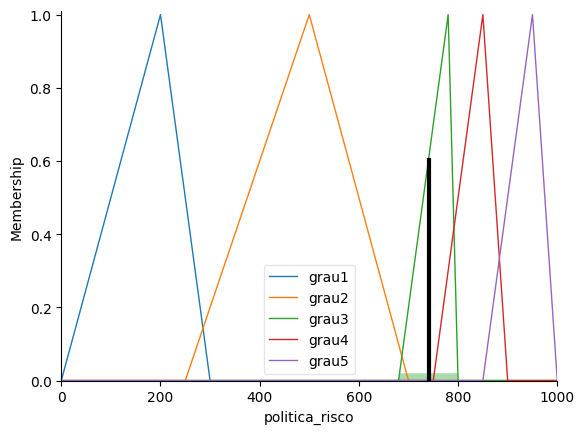

In [8]:
!pip install scikit-fuzzy numpy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definição dos universos de discurso
universo_score = np.arange(0, 1001, 1)
universo_engajamento = np.arange(0, 5001, 1)
universo_risco = np.arange(0, 1001, 1)  # Usaremos um universo numérico para o risco

# Criação das variáveis fuzzy
score_mercado = ctrl.Antecedent(universo_score, 'score_mercado')
score_interno = ctrl.Antecedent(universo_score, 'score_interno')
engajamento = ctrl.Antecedent(universo_engajamento, 'engajamento')
politica_risco = ctrl.Consequent(universo_risco, 'politica_risco')

# Funções de pertinência para score de mercado
score_mercado['RATING1'] = fuzz.trimf(score_mercado.universe, [0, 100, 210])
score_mercado['RATING2'] = fuzz.trimf(score_mercado.universe, [210, 300, 400])
score_mercado['RATING3'] = fuzz.trimf(score_mercado.universe, [400, 500, 580])
score_mercado['RATING4'] = fuzz.trimf(score_mercado.universe, [580, 700, 780])
score_mercado['RATING5'] = fuzz.trimf(score_mercado.universe, [780, 850, 900])
score_mercado['RATING6'] = fuzz.trimf(score_mercado.universe, [900, 950, 1000])

# Funções de pertinência para score interno
score_interno['RATING1'] = fuzz.trimf(score_interno.universe, [0, 100, 220])
score_interno['RATING2'] = fuzz.trimf(score_interno.universe, [220, 300, 390])
score_interno['RATING3'] = fuzz.trimf(score_interno.universe, [390, 500, 590])
score_interno['RATING4'] = fuzz.trimf(score_interno.universe, [590, 700, 780])
score_interno['RATING5'] = fuzz.trimf(score_interno.universe, [780, 850, 900])
score_interno['RATING6'] = fuzz.trimf(score_interno.universe, [900, 950, 1000])

# Funções de pertinência para engajamento
engajamento['baixo'] = fuzz.trimf(engajamento.universe, [0, 50, 70])
engajamento['medio'] = fuzz.trimf(engajamento.universe, [70, 100, 200])
engajamento['alto'] = fuzz.trimf(engajamento.universe, [200, 1000, 5000])

# Funções de pertinência para política de risco (graus como conjuntos fuzzy)
politica_risco['grau1'] = fuzz.trimf(politica_risco.universe, [0, 200, 300])
politica_risco['grau2'] = fuzz.trimf(politica_risco.universe, [250, 500, 700])
politica_risco['grau3'] = fuzz.trimf(politica_risco.universe, [680, 780, 800])
politica_risco['grau4'] = fuzz.trimf(politica_risco.universe, [750, 850, 900])
politica_risco['grau5'] = fuzz.trimf(politica_risco.universe, [850, 950, 1000])

# Definição das regras fuzzy
rule1 = ctrl.Rule(engajamento['baixo'] & (score_interno['RATING6'] | score_interno['RATING5'] | score_interno['RATING4'] | score_interno['RATING3']) & (score_mercado['RATING6'] | score_mercado['RATING5'] | score_mercado['RATING4'] | score_mercado['RATING3']), politica_risco['grau5'])
rule2 = ctrl.Rule(engajamento['baixo'] & (score_interno['RATING1'] | score_interno['RATING2']) & (score_mercado['RATING1'] | score_mercado['RATING2']), politica_risco['grau4'])
rule3 = ctrl.Rule(engajamento['medio'] & (score_interno['RATING6'] | score_interno['RATING5'] | score_interno['RATING4']) & (score_mercado['RATING6'] | score_mercado['RATING5'] | score_mercado['RATING4']), politica_risco['grau5'])
rule4 = ctrl.Rule(engajamento['medio'] & (score_interno['RATING1'] | score_interno['RATING2'] | score_interno['RATING3']) & (score_mercado['RATING1'] | score_mercado['RATING2'] | score_mercado['RATING3']), politica_risco['grau3'])
rule5 = ctrl.Rule(engajamento['alto'] & score_interno['RATING6'] & score_mercado['RATING6'], politica_risco['grau4'])
rule6 = ctrl.Rule(engajamento['alto'] & (score_interno['RATING4'] | score_interno['RATING5']) & (score_mercado['RATING4'] | score_mercado['RATING5']), politica_risco['grau3'])
rule7 = ctrl.Rule(engajamento['alto'] & score_interno['RATING3'] & score_mercado['RATING3'], politica_risco['grau2'])
rule8 = ctrl.Rule(engajamento['alto'] & (score_interno['RATING1'] | score_interno['RATING2']) & (score_mercado['RATING1'] | score_mercado['RATING2']), politica_risco['grau1'])

# Criação do sistema de controle fuzzy
politica_risco_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])

# Criação da simulação
politica_risco_simulador = ctrl.ControlSystemSimulation(politica_risco_ctrl)

# Entradas para o cálculo
politica_risco_simulador.input['score_mercado'] = 2
politica_risco_simulador.input['score_interno'] = 230
politica_risco_simulador.input['engajamento'] = 90

# Cálculo da política de risco
politica_risco_simulador.compute()

# Exibição do resultado
print(f"Para score_mercado = 2, score_interno = 230 e engajamento = 90:")
print(f"A política de risco calculada é: {politica_risco_simulador.output['politica_risco']:.2f}")

# (Opcional) Visualização das funções de pertinência e da saída
score_mercado.view()
score_interno.view()
engajamento.view()
politica_risco.view(sim=politica_risco_simulador)